In [2]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
df = pd.DataFrame(iris.data, columns= iris.feature_names)

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
df[df['target']==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [17]:
df[df['target']==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [18]:
#add one more column
df['flower_name']= df.target.apply(lambda x: iris.target_names[x])

In [21]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [22]:
#visualize this data
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

In [26]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


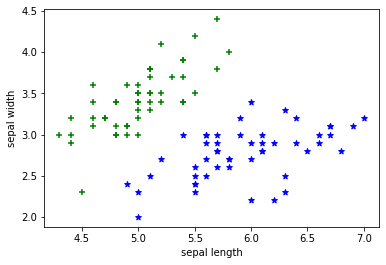

In [31]:
plt.xlabel('sepal length')
plt.ylabel('sepal width')

plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green', marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue', marker='*')

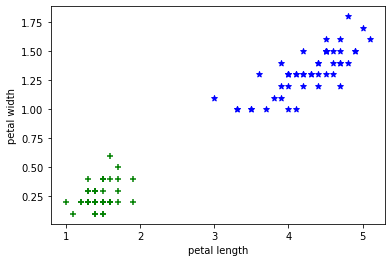

In [32]:
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green', marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue', marker='*');

In [33]:
from sklearn.model_selection import train_test_split

In [35]:
X= df.drop(['target', 'flower_name'],axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [36]:
y=df.target

In [38]:
y

145    2
146    2
147    2
148    2
149    2
Name: target, dtype: int32

In [41]:
X_train,X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=0)

In [42]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2


In [47]:
from sklearn.svm import SVC
model=SVC(C=10)    # C for regularization, gamma value also can put , kernel='linear'

In [48]:
model.fit(X_train,y_train)

SVC(C=10)

In [49]:
model.score(X_test, y_test)

1.0

In [51]:
model.predict([[6,3,5,2.5]])

array([2])

In [50]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2
100,6.3,3.3,6.0,2.5
40,5.0,3.5,1.3,0.3
86,6.7,3.1,4.7,1.5
76,6.8,2.8,4.8,1.4
71,6.1,2.8,4.0,1.3
